In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\Ayush\miniconda3\envs\6.86x\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ayush\miniconda3\envs\6.86x\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ayush\miniconda3\envs\6.86x\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Ayush\miniconda3\envs\6.86x\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Ayush\miniconda3\envs\6.86x\lib\

In [2]:
data = pd.read_csv('./train.csv')
data.head()

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [3]:
data.isnull().sum()

id              0
title           0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [4]:
dummis1 = pd.get_dummies(data['maincateg'],prefix='maincateg')



data  = pd.concat([data,dummis1.iloc[:,1:]],axis=1)

dummis2 = pd.get_dummies(data['platform'],prefix='platform')
data  = pd.concat([data,dummis2.iloc[:,1:]],axis=1)

data.drop('platform',axis=1,inplace=True)
data.drop('maincateg',axis=1,inplace=True)
#df_train.dropna(inplace=True)

In [5]:
data.isna().sum()

id                     0
title                  0
Rating                 0
price1                 0
actprice1              0
Offer %                0
norating1            678
noreviews1           578
star_5f              588
star_4f              539
star_3f              231
star_2f                0
star_1f                0
fulfilled1             0
maincateg_Women        0
platform_Flipkart      0
dtype: int64

In [6]:
data['norating1'] = data['norating1'].fillna(data['norating1'].mean())
data['noreviews1'] = data['noreviews1'].fillna(data['noreviews1'].mean())
data['star_5f'] = data['star_5f'].fillna(data['star_5f'].mean())
data['star_4f'] = data['star_4f'].fillna(data['star_4f'].mean())
data['star_3f'] = data['star_3f'].fillna(data['star_3f'].mean())
data['star_2f'] = data['star_2f'].fillna(data['star_2f'].mean())
data['star_1f'] = data['star_1f'].fillna(data['star_1f'].mean())

In [7]:
print(data.isna().sum())
data.shape

id                   0
title                0
Rating               0
price1               0
actprice1            0
Offer %              0
norating1            0
noreviews1           0
star_5f              0
star_4f              0
star_3f              0
star_2f              0
star_1f              0
fulfilled1           0
maincateg_Women      0
platform_Flipkart    0
dtype: int64


(15730, 16)

In [8]:
data.columns

Index(['id', 'title', 'Rating', 'price1', 'actprice1', 'Offer %', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1', 'maincateg_Women', 'platform_Flipkart'],
      dtype='object')

In [9]:
data.dtypes

id                     int64
title                 object
Rating               float64
price1                 int64
actprice1              int64
Offer %               object
norating1            float64
noreviews1           float64
star_5f              float64
star_4f              float64
star_3f              float64
star_2f                int64
star_1f                int64
fulfilled1             int64
maincateg_Women        uint8
platform_Flipkart      uint8
dtype: object

<AxesSubplot:xlabel='fulfilled1', ylabel='maincateg_Women'>

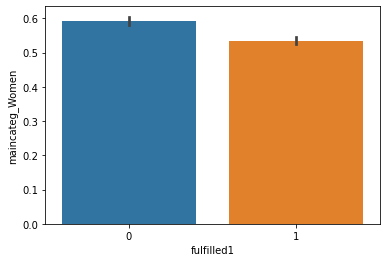

In [10]:
sns.barplot(x = data["fulfilled1"], y = data["maincateg_Women"])

In [11]:
X_train = data[['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f','star_3f', 'star_2f', 'star_1f', 'fulfilled1',
       'maincateg_Women', 'platform_Flipkart']]
y_train = data['price1']

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_scaled = sc.fit_transform(X_train)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
lm.score(X_scaled,y_train)

0.8026388541741781

In [24]:
df_test = pd.read_csv('./test.csv')

In [25]:
dummis3 = pd.get_dummies(df_test['maincateg'],prefix='maincateg')



df_test  = pd.concat([df_test,dummis3.iloc[:,1:]],axis=1)

dummis4 = pd.get_dummies(df_test['platform'],prefix='platform')
df_test  = pd.concat([df_test,dummis4.iloc[:,1:]],axis=1)

df_test.drop('platform',axis=1,inplace=True)
df_test.drop('maincateg',axis=1,inplace=True)
#df_test.dropna(inplace=True)

In [26]:
df_test['norating1'] = df_test['norating1'].fillna(df_test['norating1'].mean())
df_test['noreviews1'] = df_test['noreviews1'].fillna(df_test['noreviews1'].mean())
df_test['star_5f'] = df_test['star_5f'].fillna(df_test['star_5f'].mean())
df_test['star_4f'] = df_test['star_4f'].fillna(df_test['star_4f'].mean())
df_test['star_3f'] = df_test['star_3f'].fillna(df_test['star_3f'].mean())
df_test['star_2f'] = df_test['star_2f'].fillna(df_test['star_2f'].mean())
df_test['star_1f'] = df_test['star_1f'].fillna(df_test['star_1f'].mean())
df_test['Rating'] = df_test['Rating'].fillna(df_test['Rating'].mean())

In [27]:
len(df_test)

5244

In [28]:
df_id = df_test['id']

In [29]:
df_test.drop('id',axis=1,inplace=True)

In [30]:
df_test.isnull().sum()

title                0
Rating               0
actprice1            0
norating1            0
noreviews1           0
star_5f              0
star_4f              0
star_3f              0
star_2f              0
star_1f              0
fulfilled1           0
maincateg_Women      0
platform_Flipkart    0
dtype: int64

In [31]:
data.columns

Index(['id', 'title', 'Rating', 'price1', 'actprice1', 'Offer %', 'norating1',
       'noreviews1', 'star_5f', 'star_4f', 'star_3f', 'star_2f', 'star_1f',
       'fulfilled1', 'maincateg_Women', 'platform_Flipkart'],
      dtype='object')

In [32]:
X_test = df_test[['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f',
       'star_3f', 'star_2f', 'star_1f', 'fulfilled1',
       'maincateg_Women', 'platform_Flipkart']]

In [25]:
x_test_scale = sc.fit_transform(X_test)

In [26]:
pre =lm.predict(x_test_scale)

In [27]:
x_test_scale.shape

(5244, 12)

In [28]:
pre.max()

7132.329580808085

In [29]:
pre_id = pd.DataFrame(np.round(pre,decimals=3),columns=['price1'])

In [30]:
pre_id

,price1
0,465.565
1,300.875
2,519.981
3,1405.264
4,466.174
...,...
5239,419.996
5240,903.006
5241,438.408
5242,227.238


In [31]:
pre_id['id'] = df_id[::]

In [32]:
pre_id

,price1,id
0,465.565,2242
1,300.875,20532
2,519.981,10648
3,1405.264,20677
4,466.174,12593
...,...,...
5239,419.996,14033
5240,903.006,297
5241,438.408,18733
5242,227.238,6162


In [33]:
pre_id = pre_id[['id', 'price1']]

In [34]:
pre_id

,id,price1
0,2242,465.565
1,20532,300.875
2,10648,519.981
3,20677,1405.264
4,12593,466.174
...,...,...
5239,14033,419.996
5240,297,903.006
5241,18733,438.408
5242,6162,227.238


In [35]:
pre_id.to_csv(r'.\hack_submission_1.csv',index=False)


## Tensorflow use karke

In [36]:
X_train.head()

,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Women,platform_Flipkart
0,3.9,999,38.0,7.0,17.0,9.0,6.0,3,3,0,1,1
1,3.8,1999,531.0,69.0,264.0,92.0,73.0,29,73,1,0,1
2,4.4,4999,17.0,4.0,11.0,3.0,2.0,1,0,1,1,1
3,4.2,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,0,1
4,3.9,2299,77.0,3.0,35.0,21.0,7.0,7,7,1,0,1


In [37]:
X_train.shape

(15730, 12)

In [38]:
y_train.head()

0     698
1     999
2    2749
3     518
4    1379
Name: price1, dtype: int64

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(12,)),
  tf.keras.layers.Dense(24, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [41]:
model.compile(optimizer= 'adam',
             loss = tf.keras.losses.MeanSquaredError(
                       name='mean_squared_error'),
             metrics = [tf.keras.metrics.Accuracy()])

history = model.fit(
    x = X_scaled,
    y = y_train,
    epochs = 15,
    steps_per_epoch = 100
)

Epoch 1/15
100/100 [==============================] - 1s 6ms/step - loss: 889948.6525 - accuracy: 0.0000e+00
Epoch 2/15
100/100 [==============================] - 1s 5ms/step - loss: 712971.4284 - accuracy: 0.0000e+00
Epoch 3/15
100/100 [==============================] - 1s 5ms/step - loss: 199208.1358 - accuracy: 1.2715e-06
Epoch 4/15
100/100 [==============================] - 1s 5ms/step - loss: 117122.8546 - accuracy: 0.0000e+00
Epoch 5/15
100/100 [==============================] - 1s 5ms/step - loss: 96596.9060 - accuracy: 0.0000e+00
Epoch 6/15
100/100 [==============================] - 1s 5ms/step - loss: 87974.7977 - accuracy: 0.0000e+00
Epoch 7/15
100/100 [==============================] - 0s 5ms/step - loss: 83928.4100 - accuracy: 0.0000e+00
Epoch 8/15
100/100 [==============================] - 1s 5ms/step - loss: 82111.1790 - accuracy: 0.0000e+00
Epoch 9/15
100/100 [==============================] - 1s 5ms/step - loss: 80824.4741 - accuracy: 0.0000e+00
Epoch 10/15
100/100 [===

In [42]:
x_val = X_scaled[:100, :]
y_val = y_train[:100]

In [43]:
y_val

0      698
1      999
2     2749
3      518
4     1379
      ... 
95     629
96     989
97     499
98     249
99     605
Name: price1, Length: 100, dtype: int64

In [44]:
pred_1 = model.predict(x_test_scale)

In [45]:
pred_1.max()

7154.376

In [46]:
pre_id = pd.DataFrame(np.round(pred_1,decimals=3),columns=['price1'])

In [47]:
pre_id['id'] = df_id[::]

pre_id = pre_id[['id', 'price1']]

In [48]:
pre_id

,id,price1
0,2242,388.609009
1,20532,305.670013
2,10648,474.782990
3,20677,1353.052002
4,12593,443.151001
...,...,...
5239,14033,384.505005
5240,297,770.161987
5241,18733,416.989990
5242,6162,251.895004


In [49]:
pre_id.to_csv(r'.\hack_submission_4.csv',index=False)


## ExtraTreesSe

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

In [16]:
X_train.columns

Index(['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_4f',
       'star_3f', 'star_2f', 'star_1f', 'fulfilled1', 'maincateg_Women',
       'platform_Flipkart'],
      dtype='object')

In [17]:
X_train_1 = X_train[['Rating', 'actprice1', 'star_5f', 'star_4f',
       'star_3f', 'star_2f', 'star_1f', 'fulfilled1', 'maincateg_Women',
       'platform_Flipkart']]

In [18]:
from sklearn.preprocessing import StandardScaler
sc_1 = StandardScaler()

X_scaled_1 = sc_1.fit_transform(X_train_1)

In [19]:
y_train_2 = data['Offer %']
y_train_2.head()

0    30.13%
1    50.03%
2    45.01%
3    15.85%
4    40.02%
Name: Offer %, dtype: object

In [20]:
y = y_train_2.str.replace("%", "")
y = y.astype(float)

In [21]:
y

0        30.13
1        50.03
2        45.01
3        15.85
4        40.02
         ...  
15725    52.71
15726    50.00
15727    34.07
15728    50.01
15729    45.02
Name: Offer %, Length: 15730, dtype: float64

In [63]:
extra_tree_forest = ExtraTreesRegressor(n_estimators = 100, min_samples_split = 4, min_samples_leaf = 2, max_features = 4, bootstrap = True  )

extra_tree_forest.fit(X_scaled_1, y)

feature_importance = extra_tree_forest.feature_importances_

feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [64]:
X_test_1 = X_test[['Rating', 'actprice1', 'star_5f', 'star_4f',
       'star_3f', 'star_2f', 'star_1f', 'fulfilled1', 'maincateg_Women',
       'platform_Flipkart']]

In [65]:
X_test_scale = sc_1.transform(X_test_1)

In [66]:
pred_offer = extra_tree_forest.predict(X_test_scale)

In [67]:
pred_offer

array([58.0653354 , 43.73544094, 53.3538659 , ..., 59.88413887,
       55.68796244,  3.13048208])

In [68]:
X_actual = X_test_1['actprice1']

In [69]:
pred_2 =(1 - pred_offer/100)*X_actual

In [70]:
pred_2 = np.round(pred_2,decimals=3)
pred_2

0        418.927
1        280.760
2        465.995
3       1149.561
4        404.660
          ...   
5239     385.766
5240     754.536
5241     400.757
5242     221.117
5243     725.553
Name: actprice1, Length: 5244, dtype: float64

In [54]:
pre_id_1 = pd.DataFrame(pred_2,columns=['actprice1'])

In [41]:
pre_id_1

,actprice1
0,440.069
1,283.392
2,497.258
3,1341.360
4,421.874
...,...
5239,369.342
5240,863.196
5241,413.926
5242,237.778


In [42]:
pre_id_1['id'] = df_id[::]

In [43]:
pre_id_1 = pre_id_1[['id', 'actprice1']]

In [44]:
df_new = pre_id_1.rename(columns={'actprice1': 'price1'})

In [45]:

df_new

,id,price1
0,2242,440.069
1,20532,283.392
2,10648,497.258
3,20677,1341.360
4,12593,421.874
...,...,...
5239,14033,369.342
5240,297,863.196
5241,18733,413.926
5242,6162,237.778


In [184]:
df_new.to_csv(r'.\hack_submission_try.csv',index=False)